In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-wisconsin-data/data.csv


In [2]:
    !pip install qiskit pylatexenc qiskit_machine_learning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.4 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 60.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.8/97.8 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.6/308.6 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 64.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 30.0 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 7.4 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=f7012158eaf4f03aa57981c3fd2f9007dac67ac76134031e0f68765e70e524ef
  Stored in direct

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
breast_cancer_dataset = pd.read_csv("../input/breast-cancer-wisconsin-data/data.csv")

In [5]:
breast_cancer_dataset.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [6]:
breast_cancer_dataset.sample(10)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
417  90602302         M        15.50         21.08          102.90      803.1   
201    877989         M        17.54         19.32          115.10      951.6   
30     853401         M        18.63         25.11          124.80     1088.0   
347     89869         B        14.76         14.74           94.87      668.7   
487    913505         M        19.44         18.82          128.10     1167.0   
381    901836         B        11.04         14.93           70.67      372.7   
254    886226         M        19.45         19.33          126.50     1169.0   
35     854253         M        16.74         21.59          110.10      869.5   
10     845636         M        16.02         23.24          102.70      797.8   
85    8612399         M        18.46         18.52          121.10     1075.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
417          0.11200           0.15710         0.15220              0.08481   
201          0.08968           0.11980         0.10360              0.07488   
30           0.10640           0.18870         0.23190              0.12440   
347          0.08875           0.07780         0.04608              0.03528   
487          0.10890           0.14480         0.22560              0.11940   
381          0.07987           0.07079         0.03546              0.02074   
254          0.10350           0.11880         0.13790              0.08591   
35           0.09610           0.13360         0.13480              0.06018   
10           0.08206           0.06669         0.03299              0.03323   
85           0.09874           0.10530         0.13350              0.08795   

     ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
417  ...          27.65           157.10      1748.0            0.1517   
201  ...          25.84           139.50      1239.0            0.1381   
30   ...          34.01           160.50      1670.0            0.1491   
347  ...          17.93           114.20       880.8            0.1220   
487  ...          30.39           153.90      1740.0            0.1514   
381  ...          20.83            79.73       447.1            0.1095   
254  ...          24.57           163.10      1972.0            0.1497   
35   ...          29.02           133.50      1229.0            0.1563   
10   ...          33.88           123.80      1150.0            0.1181   
85   ...          27.68           152.20      1603.0            0.1398   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
417             0.4002           0.4211               0.21340          0.3003   
201             0.3420           0.3508               0.19390          0.2928   
30              0.4257           0.6133               0.18480          0.3444   
347             0.2009           0.2151               0.12510          0.3109   
487             0.3725           0.5936               0.20600          0.3266   
381             0.1982           0.1553               0.06754          0.3202   
254             0.3161           0.4317               0.19990          0.3379   
35              0.3835           0.5409               0.18130          0.4863   
10              0.1551           0.1459               0.09975          0.2948   
85              0.2089           0.3157               0.16420          0.3695   

     fractal_dimension_worst  Unnamed: 32  
417                  0.10480          NaN  
201                  0.07867          NaN  
30                   0.09782          NaN  
347                  0.08187          NaN  
487                  0.09009          NaN  
381                  0.07287          NaN  
254                  0.08950          NaN  
35                   0.08633          NaN  
10                   0.08452          NaN  
85                   0.08579          NaN  

[10 rows x 33 columns]

In [7]:
breast_cancer_dataset.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  texture_worst  perimeter_worst   area_worst  \
count     569.000000  ...     569.000000       569.000000   569.000000   
mean        0.181162  ...      25.677223       107.261213   880.583128   
std         0.027414  ...       6.146258        33.602542   569.356993   
min         0.106000  ...      12.020000        50.410000   185.200000   
25%         0.161900  ...      21.080000        84.110000   515.300000   
50%         0.179200  ...      25.410000        97.660000   686.500000   
75%         0.195700  ...      29.720000       125.400000  1084.000000   
max         0.304000  ...      49.540000       251.200000  4254.000000   

       smoothness_worst  compactness_worst  concavity_worst  \
count        569.000000         569.000000       569.000000   
mean           0.132369           0.254265         0.272188   
std            0.022832           0.157336         0.208624   
min            0.071170           0.027290         0.000000   
25%            0.116600           0.147200         0.114500   
50%            0.131300           0.211900         0.226700   
75%            0.146000           0.339100         0.382900   
max            0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  \
count            569.000000      569.000000               569.000000   
mean               0.114606        0.290076                 0.083946   
std                0.065732        0.061867                 0.018061   
min                0.000000        0.156500                 0.055040   
25%                0.064930        0.250400                 0.071460   
50%                0.099930        0.282200                 0.080040   
75%                0.161400        0.317900                 0.092080   
max                0.291000        0.663800                 0.207500   

       Unnamed: 32  
count          0.0  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN  

[8 rows x 32 columns]

In [8]:
breast_cancer_dataset.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [9]:
breast_cancer_dataset['diagnosis'] = breast_cancer_dataset['diagnosis'].replace(['B', 'M'], [0, 1])

In [10]:
breast_cancer_dataset = breast_cancer_dataset.drop(['id', 'Unnamed: 32'], axis=1)

In [11]:
breast_cancer_dataset.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [12]:
breast_cancer_dataset.sample(10)

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
563          1       20.920         25.09          143.00     1347.0   
384          0       13.280         13.72           85.79      541.8   
181          1       21.090         26.57          142.70     1311.0   
191          0       12.770         21.41           82.02      507.4   
114          0        8.726         15.83           55.84      230.9   
263          1       15.610         19.38          100.00      758.6   
348          0       11.470         16.03           73.02      402.7   
464          0       13.170         18.22           84.28      537.3   
82           1       25.220         24.91          171.50     1878.0   
108          1       22.270         19.67          152.80     1509.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
563          0.10990           0.22360         0.31740              0.14740   
384          0.08363           0.08575         0.05077              0.02864   
181          0.11410           0.28320         0.24870              0.14960   
191          0.08749           0.06601         0.03112              0.02864   
114          0.11500           0.08201         0.04132              0.01924   
263          0.07840           0.05616         0.04209              0.02847   
348          0.09076           0.05886         0.02587              0.02322   
464          0.07466           0.05994         0.04859              0.02870   
82           0.10630           0.26650         0.33390              0.18450   
108          0.13260           0.27680         0.42640              0.18230   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
563         0.2149  ...        24.290          29.41           179.10   
384         0.1617  ...        14.240          17.37            96.59   
181         0.2395  ...        26.680          33.48           176.50   
191         0.1694  ...        13.750          23.50            89.04   
114         0.1649  ...         9.628          19.62            64.48   
263         0.1547  ...        17.910          31.67           115.90   
348         0.1634  ...        12.510          20.79            79.67   
464         0.1454  ...        14.900          23.89            95.10   
82          0.1829  ...        30.000          33.62           211.70   
108         0.2556  ...        28.400          28.01           206.80   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
563      1819.0           0.14070            0.41860          0.65990   
384       623.7           0.11660            0.26850          0.28660   
181      2089.0           0.14910            0.75840          0.67800   
191       579.5           0.09388            0.08978          0.05186   
114       284.4           0.17240            0.23640          0.24560   
263       988.6           0.10840            0.18070          0.22600   
348       475.8           0.15310            0.11200          0.09823   
464       687.6           0.12820            0.19650          0.18760   
82       2562.0           0.15730            0.60760          0.64760   
108      2360.0           0.17010            0.69970          0.96080   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
563               0.25420          0.2929                  0.09873  
384               0.09173          0.2736                  0.07320  
181               0.29030          0.4098                  0.12840  
191               0.04773          0.2179                  0.06871  
114               0.10500          0.2926                  0.10170  
263               0.08568          0.2683                  0.06829  
348               0.06548          0.2851                  0.08763  
464               0.10450          0.2235                  0.06925  
82                0.28670          0.2355                  0.10510  
108               0.29100          0.4055   

In [13]:
breast_cancer_dataset = breast_cancer_dataset.drop(['radius_se', 'texture_se', 
                        'perimeter_se', 'area_se', 'smoothness_se','compactness_se', 
                        'concavity_se', 'concave points_se', 'symmetry_se',
                        'fractal_dimension_se', 'radius_worst', 'texture_worst',
                        'perimeter_worst', 'area_worst', 'smoothness_worst',
                        'compactness_worst', 'concavity_worst', 'concave points_worst',
                        'symmetry_worst', 'fractal_dimension_worst'], axis=1)

In [14]:
breast_cancer_dataset.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  fractal_dimension_mean  
0         0.2419                 0.07871  
1         0.1812                 0.05667  
2         0.2069                 0.05999  
3         0.2597                 0.09744  
4         0.1809                 0.05883

In [15]:
breast_cancer_dataset.shape

(569, 11)

Negative (0):  357
Positive (1):  212


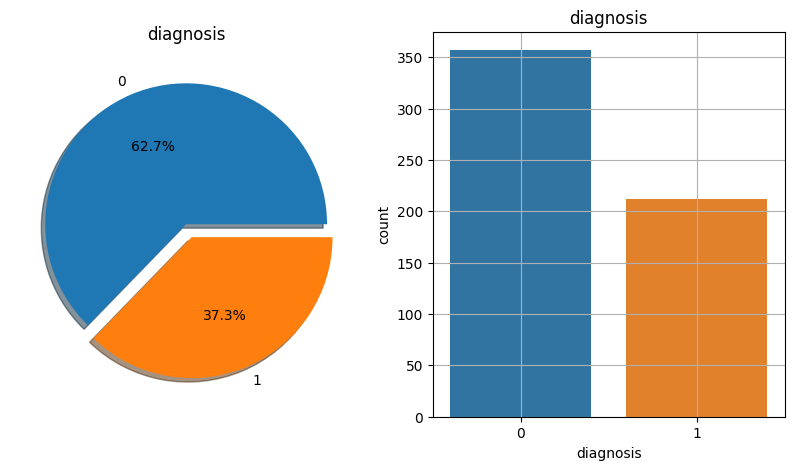

In [16]:

# outcome count plot
f, ax = plt.subplots(1, 2, figsize=(10, 5))
# Pie chart
breast_cancer_dataset['diagnosis'].value_counts().plot.pie(
    explode=[0, 0.1],
    autopct='%1.1f%%',
    ax=ax[0],
    shadow=True
)
ax[0].set_title('diagnosis')
ax[0].set_ylabel('')
# Count plot
sns.countplot(x='diagnosis', data=breast_cancer_dataset, ax=ax[1])
ax[1].set_title('diagnosis')
N, P = breast_cancer_dataset['diagnosis'].value_counts()
print('Negative (0): ', N)
print('Positive (1): ', P)
plt.grid()
plt.show()

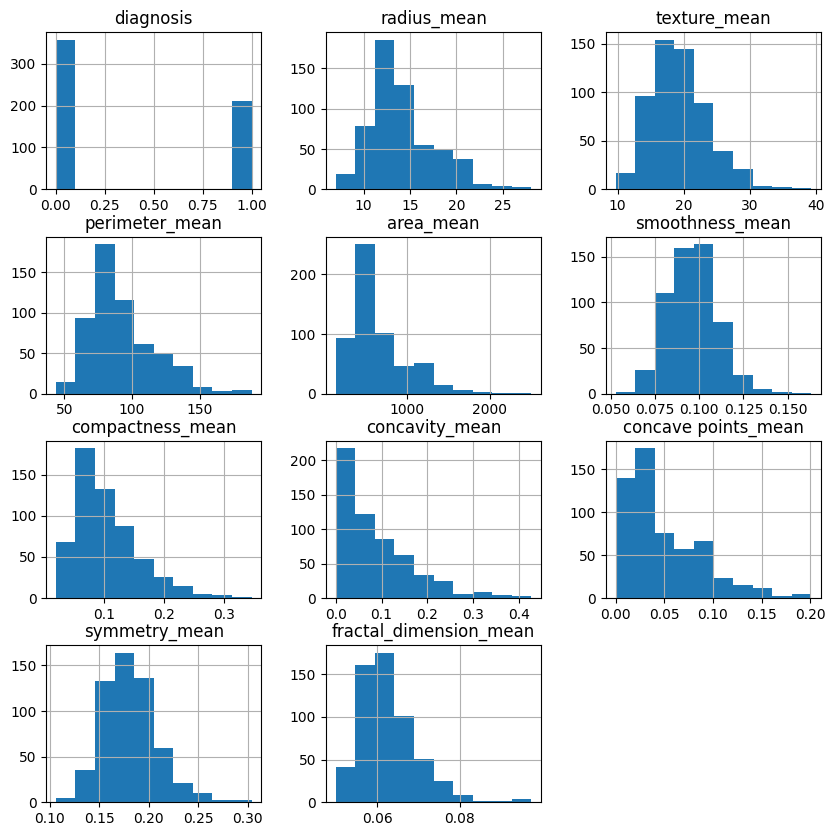

In [17]:
breast_cancer_dataset.hist(bins=10,figsize=(10,10))
plt.show()

In [18]:
target_name = 'diagnosis'
labels_dataset = breast_cancer_dataset[target_name]
features_dataset = breast_cancer_dataset.drop(target_name, axis=1)

print("Features =\n", features_dataset)
print("labels =\n", labels_dataset)

Features =
      radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave poin

In [19]:
labels_dataset.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [20]:
from sklearn.preprocessing import MinMaxScaler

features_dataset = MinMaxScaler().fit_transform(features_dataset)

print("Features =\n", features_dataset)
print("labels =\n", labels_dataset)

Features =
 [[0.52103744 0.0226581  0.54598853 ... 0.73111332 0.68636364 0.60551811]
 [0.64314449 0.27257355 0.61578329 ... 0.34875746 0.37979798 0.14132266]
 [0.60149557 0.3902604  0.59574321 ... 0.63568588 0.50959596 0.21124684]
 ...
 [0.45525108 0.62123774 0.44578813 ... 0.26351889 0.26767677 0.13732098]
 [0.64456434 0.66351031 0.66553797 ... 0.7554672  0.67525253 0.42544229]
 [0.03686876 0.50152181 0.02853984 ... 0.         0.26616162 0.18702612]]
labels =
 0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64


# **Training a classical ml model**

In [21]:
pip install qiskit-machine-learning

Note: you may need to restart the kernel to use updated packages.


In [22]:
from sklearn.model_selection import train_test_split
from qiskit_algorithms.utils import algorithm_globals

train_features, test_features, train_labels, test_labels = train_test_split(
    features_dataset, labels_dataset, train_size=0.8, random_state=123)

In [23]:
from sklearn.svm import SVC

svc = SVC()
_ = svc.fit(train_features, train_labels) 

In [24]:
train_score_c4 = svc.score(train_features, train_labels)
test_score_c4 = svc.score(test_features, test_labels)

print(f"Classical SVC on the training dataset: {train_score_c4:.2f}")
print(f"Classical SVC on the test dataset:     {test_score_c4:.2f}")

Classical SVC on the training dataset: 0.96
Classical SVC on the test dataset:     0.96


# **Training a Quantum Machine Learning Model**

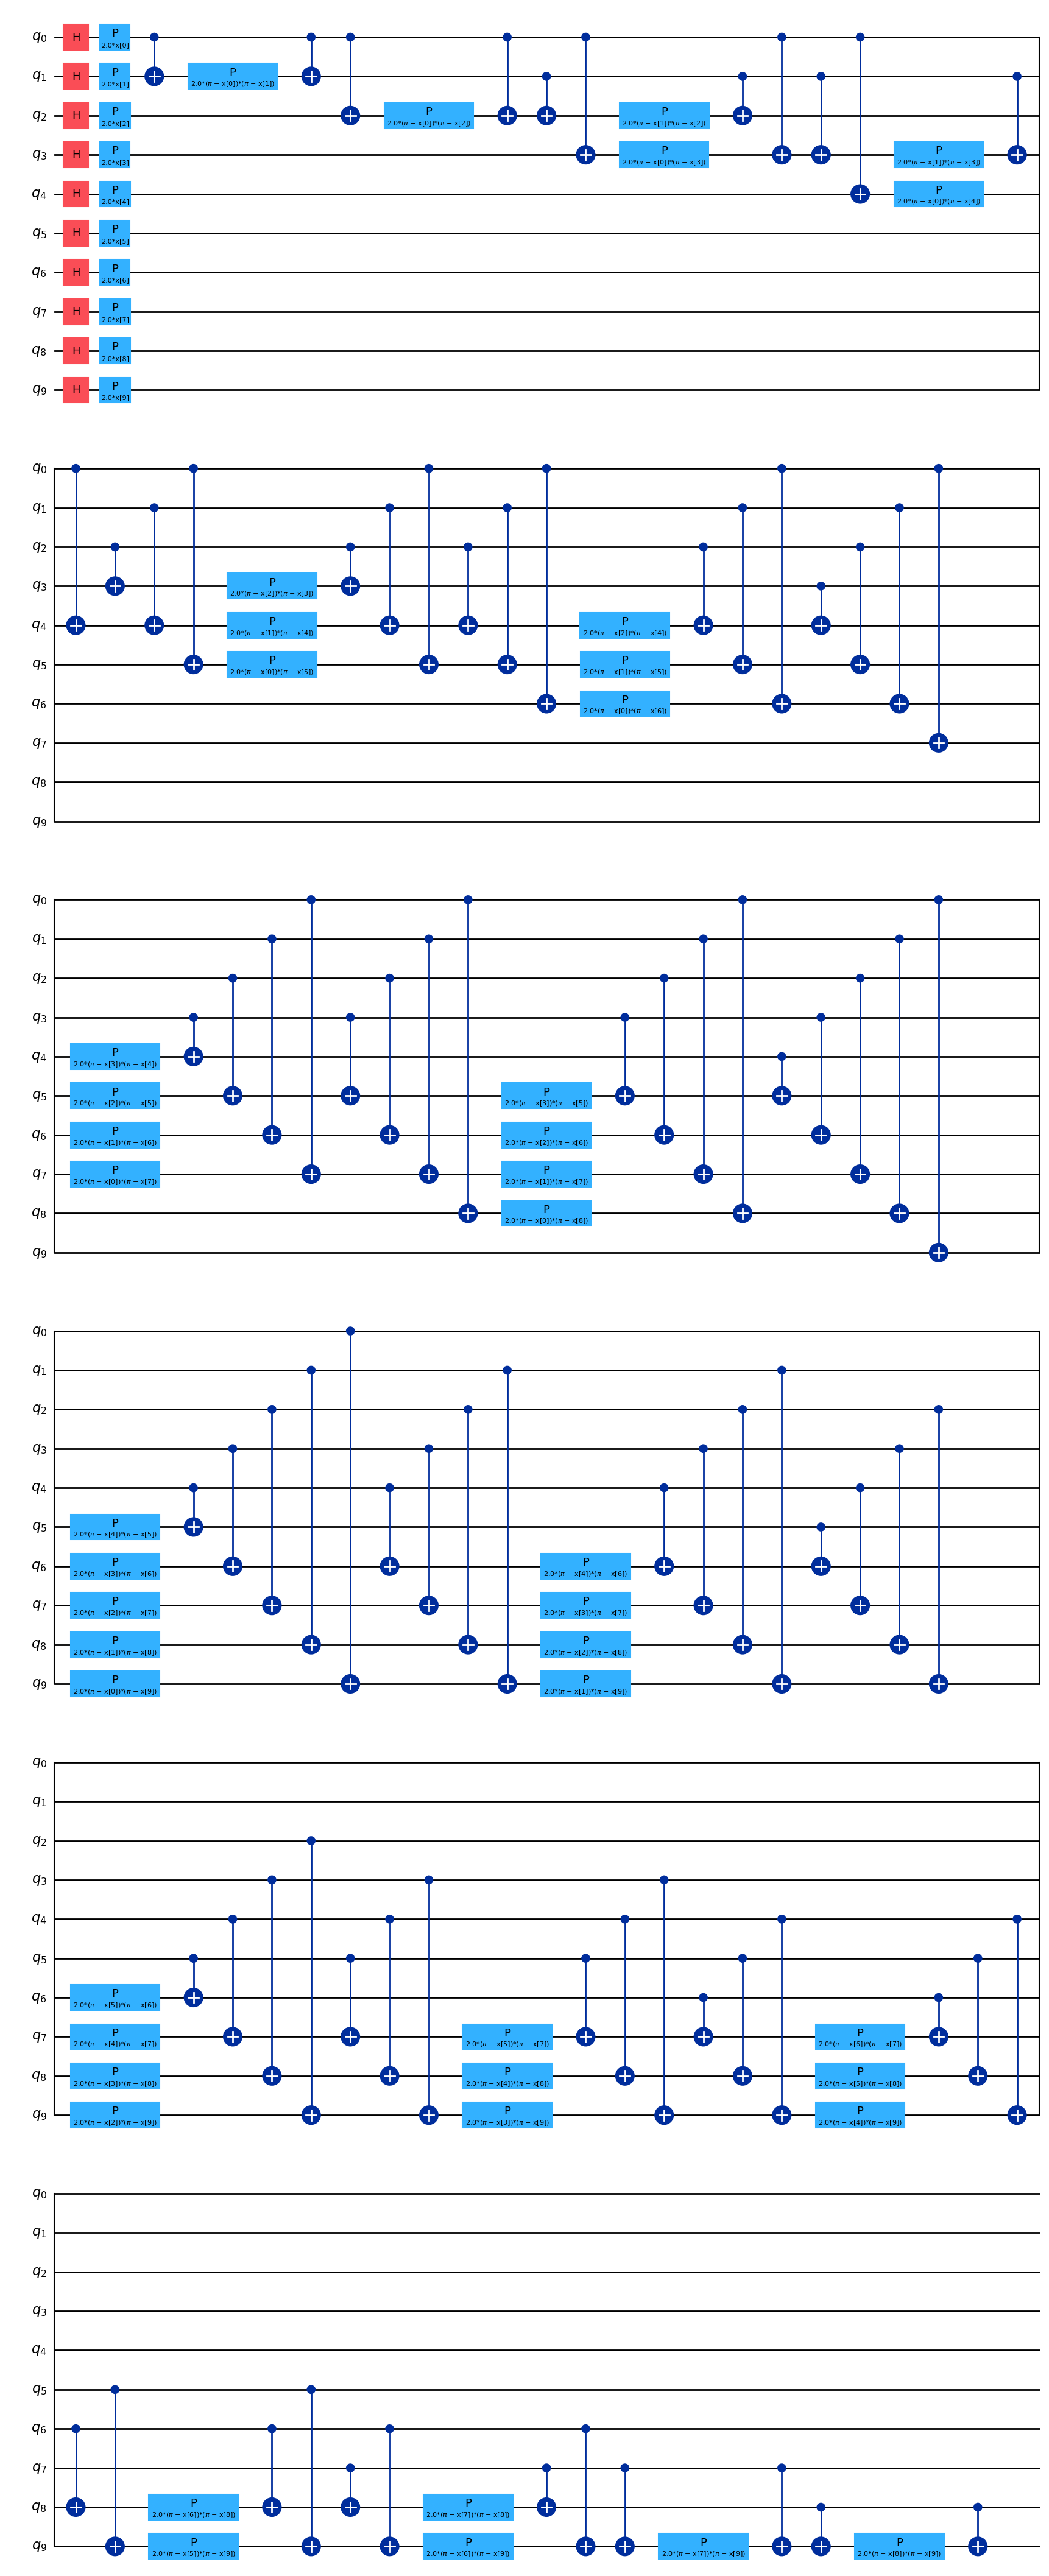

In [91]:
from qiskit.circuit.library import ZZFeatureMap

num_features = features_dataset.shape[1]

feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
feature_map.decompose().draw(output="mpl")

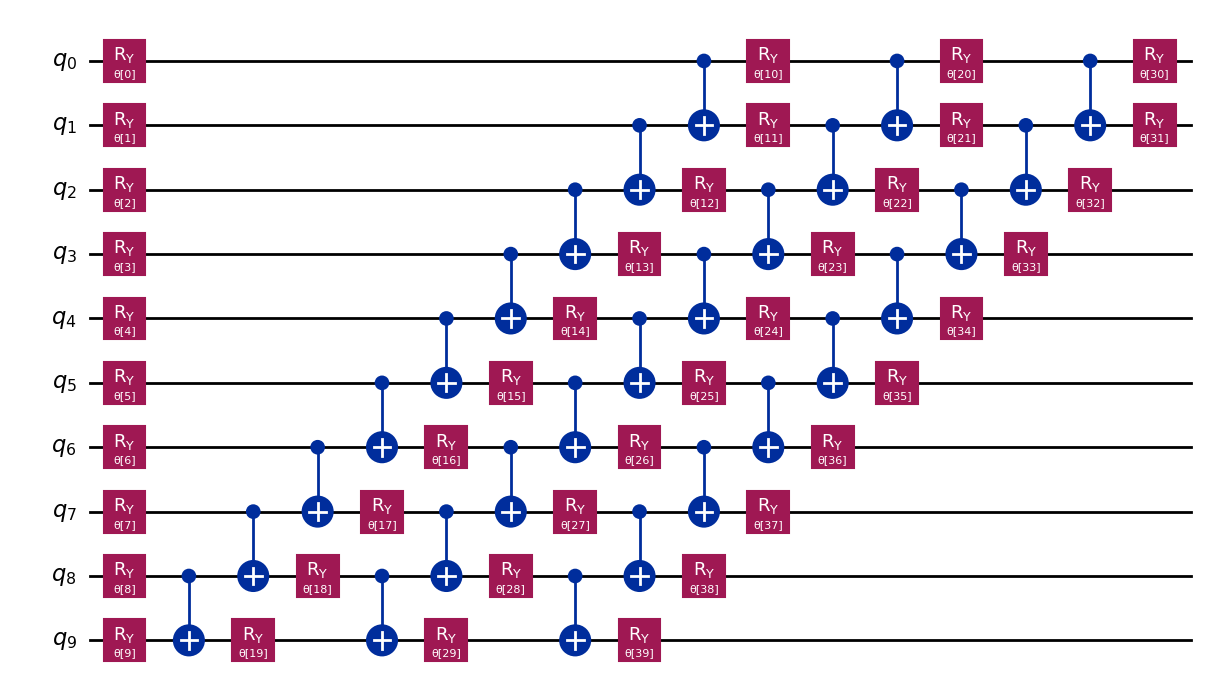

In [92]:
from qiskit.circuit.library import RealAmplitudes

ansatz = RealAmplitudes(num_qubits=num_features, reps=3)
ansatz.decompose().draw(output="mpl")

In [31]:
from qiskit_algorithms.optimizers import COBYLA

optimizer = COBYLA(maxiter=10)

In [32]:
from qiskit.primitives import Sampler

sampler = Sampler()

In [33]:
from matplotlib import pyplot as plt
from IPython.display import clear_output

objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)


def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

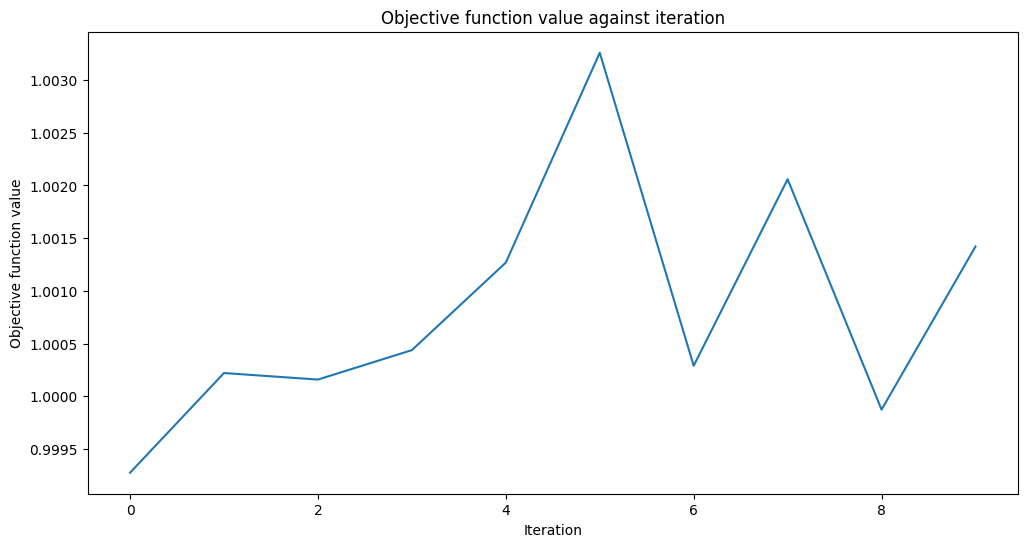

Training time: 221 seconds


In [34]:
import time
import numpy as np


from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []

# Convert pandas Series to numpy arrays
train_features = np.array(train_features)
train_labels = np.array(train_labels)

start = time.time()
vqc.fit(train_features, train_labels)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")


In [35]:
train_score_q4 = vqc.score(train_features, train_labels)
test_score_q4 = vqc.score(test_features, test_labels)

print(train_features.shape)
print(train_labels.shape)

print(test_features.shape)
print(test_labels.shape)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

(455, 10)
(455,)
(114, 10)
(114,)
Quantum VQC on the training dataset: 0.52
Quantum VQC on the test dataset:     0.46


Features =
 [[0.52103744 0.0226581  0.54598853 ... 0.73111332 0.68636364 0.60551811]
 [0.64314449 0.27257355 0.61578329 ... 0.34875746 0.37979798 0.14132266]
 [0.60149557 0.3902604  0.59574321 ... 0.63568588 0.50959596 0.21124684]
 ...
 [0.45525108 0.62123774 0.44578813 ... 0.26351889 0.26767677 0.13732098]
 [0.64456434 0.66351031 0.66553797 ... 0.7554672  0.67525253 0.42544229]
 [0.03686876 0.50152181 0.02853984 ... 0.         0.26616162 0.18702612]]
labels =
 0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64
Features =
 [[0.52103744 0.0226581  0.54598853 ... 0.73111332 0.68636364 0.60551811]
 [0.64314449 0.27257355 0.61578329 ... 0.34875746 0.37979798 0.14132266]
 [0.60149557 0.3902604  0.59574321 ... 0.63568588 0.50959596 0.21124684]
 ...
 [0.45525108 0.62123774 0.44578813 ... 0.26351889 0.26767677 0.13732098]
 [0.64456434 0.66351031 0.66553797 ... 0.7554672  0.67525253 0.42544229]
 [0.036868

<Axes: >

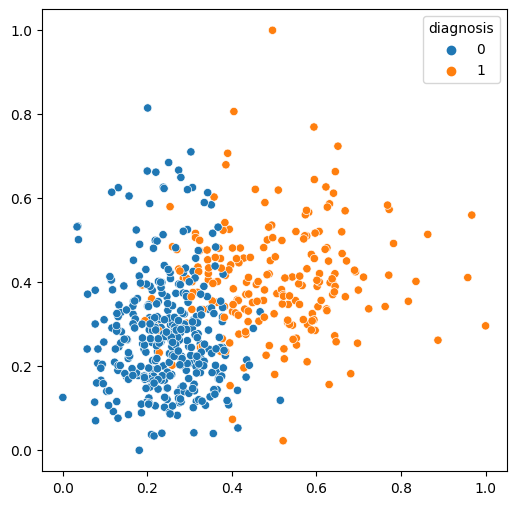

In [38]:
from sklearn.decomposition import PCA

print("Features =\n", features_dataset)
print("labels =\n", labels_dataset)

features = PCA(n_components=10).fit_transform(features_dataset)

print("Features =\n", features_dataset)
print("labels =\n", labels_dataset)

print(train_features.shape)
print(train_labels.shape)

print(test_features.shape)
print(test_labels.shape)

plt.rcParams["figure.figsize"] = (6, 6)
sns.scatterplot(x=features_dataset[:, 0], y=features_dataset[:, 1], hue=labels_dataset, palette="tab10")

In [40]:
print(train_features.shape)
print(train_labels.shape)

print(test_features.shape)
print(test_labels.shape)

train_features, test_features, train_labels, test_labels = train_test_split(
    features_dataset, labels_dataset, train_size=0.8, random_state=algorithm_globals.random_seed
)

print(train_features.shape)
print(train_labels.shape)

print(test_features.shape)
print(test_labels.shape)

svc.fit(train_features, train_labels)

print(train_features.shape)
print(train_labels.shape)

print(test_features.shape)
print(test_labels.shape)

train_score_c2 = svc.score(train_features, train_labels)
test_score_c2 = svc.score(test_features, test_labels)

print(train_features.shape)
print(train_labels.shape)

print(test_features.shape)
print(test_labels.shape)

print(f"Classical SVC on the training dataset: {train_score_c2:.2f}")
print(f"Classical SVC on the test dataset:     {test_score_c2:.2f}")

(455, 10)
(455,)
(114, 10)
(114,)
(455, 10)
(455,)
(114, 10)
(114,)
(455, 10)
(455,)
(114, 10)
(114,)
(455, 10)
(455,)
(114, 10)
(114,)
Classical SVC on the training dataset: 0.95
Classical SVC on the test dataset:     0.97


In [41]:
num_features = features.shape[1]

feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
ansatz = RealAmplitudes(num_qubits=num_features, reps=3)


In [43]:
optimizer = COBYLA(maxiter=40)

In [44]:
print(train_features.shape)
print(train_labels.shape)

print(test_features.shape)
print(test_labels.shape)

(455, 10)
(455,)
(114, 10)
(114,)


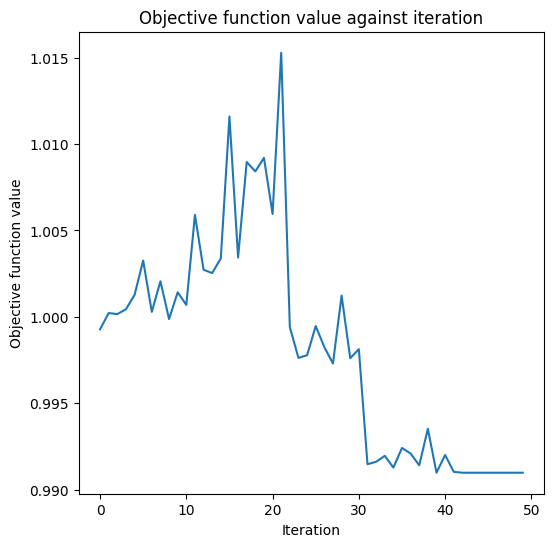

Training time: 881 seconds


In [45]:
vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

print(train_features.shape)
print(train_labels.shape)

print(test_features.shape)
print(test_labels.shape)

# Convert pandas Series to numpy arrays
train_features = np.array(train_features)
train_labels = np.array(train_labels)

print(train_features.shape)
print(train_labels.shape)

print(test_features.shape)
print(test_labels.shape)

start = time.time()
vqc.fit(train_features, train_labels)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

In [46]:
print(train_features.shape)
print(train_labels.shape)
print(test_features.shape)
print(test_labels.shape)

train_score_q2_ra = vqc.score(train_features, train_labels)
test_score_q2_ra = vqc.score(test_features, test_labels)

print(f"Quantum VQC on the training dataset using RealAmplitudes: {train_score_q2_ra:.2f}")
print(f"Quantum VQC on the test dataset using RealAmplitudes:     {test_score_q2_ra:.2f}")

(455, 10)
(455,)
(114, 10)
(114,)
Quantum VQC on the training dataset using RealAmplitudes: 0.58
Quantum VQC on the test dataset using RealAmplitudes:     0.58


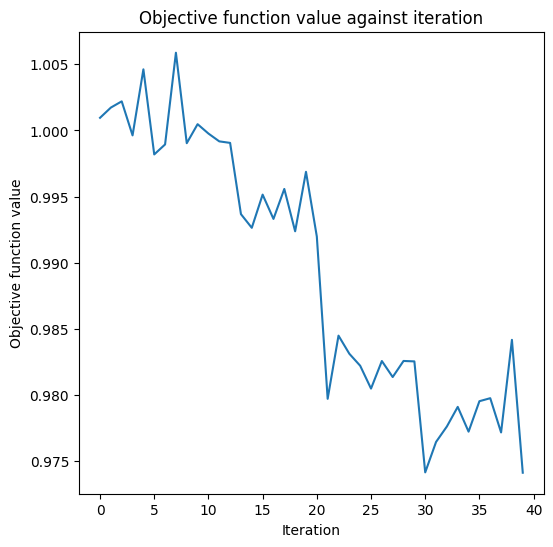

Training time: 978 seconds


In [47]:
from qiskit.circuit.library import EfficientSU2

ansatz = EfficientSU2(num_qubits=num_features, reps=3)
optimizer = COBYLA(maxiter=40)

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []

start = time.time()
vqc.fit(train_features, train_labels)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

In [48]:
train_score_q2_eff = vqc.score(train_features, train_labels)
test_score_q2_eff = vqc.score(test_features, test_labels)

print(f"Quantum VQC on the training dataset using EfficientSU2: {train_score_q2_eff:.2f}")
print(f"Quantum VQC on the test dataset using EfficientSU2:     {test_score_q2_eff:.2f}")

Quantum VQC on the training dataset using EfficientSU2: 0.66
Quantum VQC on the test dataset using EfficientSU2:     0.49


In [49]:
print(f"Model                           | Test Score | Train Score")
print(f"SVC, 4 features                 | {train_score_c4:10.2f} | {test_score_c4:10.2f}")
print(f"VQC, 4 features, RealAmplitudes | {train_score_q4:10.2f} | {test_score_q4:10.2f}")
print(f"----------------------------------------------------------")
print(f"SVC, 2 features                 | {train_score_c2:10.2f} | {test_score_c2:10.2f}")
print(f"VQC, 2 features, RealAmplitudes | {train_score_q2_ra:10.2f} | {test_score_q2_ra:10.2f}")
print(f"VQC, 2 features, EfficientSU2   | {train_score_q2_eff:10.2f} | {test_score_q2_eff:10.2f}")

Model                           | Test Score | Train Score
SVC, 4 features                 |       0.96 |       0.96
VQC, 4 features, RealAmplitudes |       0.52 |       0.46
----------------------------------------------------------
SVC, 2 features                 |       0.95 |       0.97
VQC, 2 features, RealAmplitudes |       0.58 |       0.58
VQC, 2 features, EfficientSU2   |       0.66 |       0.49


In [59]:
from sklearn.metrics import accuracy_score

# Assuming 'trained_model' is your trained machine learning model
# and 'train_features', 'train_labels' are your training data and labels
train_predictions = svc.predict(train_features)
training_accuracy = accuracy_score(train_labels, train_predictions)

print(f"Training Accuracy of svc : {training_accuracy}")

train_predictions = vqc.predict(train_features)
training_accuracy = accuracy_score(train_labels, train_predictions)

print(f"Training Accuracy of vqc : {training_accuracy}")

test_predictions = svc.predict(test_features)
testing_accuracy = accuracy_score(test_labels, test_predictions)

print(f"Testing Accuracy of svc : {testing_accuracy}")

test_predictions = vqc.predict(test_features)
testing_accuracy = accuracy_score(test_labels, test_predictions)

print(f"Testing Accuracy of vqc : {testing_accuracy}")

Training Accuracy of svc : 0.9494505494505494
Training Accuracy of vqc : 0.6637362637362637
Testing Accuracy of svc : 0.9736842105263158
Testing Accuracy of vqc : 0.49122807017543857


In [62]:
data = pd.read_csv("../input/breast-cancer-wisconsin-data/data.csv")

In [64]:
data.drop('Unnamed: 32', axis = 1, inplace = True)

In [67]:
data['diagnosis'] = breast_cancer_dataset['diagnosis'].replace(['B', 'M'], [0, 1])

In [68]:
data.corr()

id  diagnosis  radius_mean  texture_mean  \
id                       1.000000   0.039769     0.074626      0.099770   
diagnosis                0.039769   1.000000     0.730029      0.415185   
radius_mean              0.074626   0.730029     1.000000      0.323782   
texture_mean             0.099770   0.415185     0.323782      1.000000   
perimeter_mean           0.073159   0.742636     0.997855      0.329533   
area_mean                0.096893   0.708984     0.987357      0.321086   
smoothness_mean         -0.012968   0.358560     0.170581     -0.023389   
compactness_mean         0.000096   0.596534     0.506124      0.236702   
concavity_mean           0.050080   0.696360     0.676764      0.302418   
concave points_mean      0.044158   0.776614     0.822529      0.293464   
symmetry_mean           -0.022114   0.330499     0.147741      0.071401   
fractal_dimension_mean  -0.052511  -0.012838    -0.311631     -0.076437   
radius_se                0.143048   0.567134     0.679090      0.275869   
texture_se              -0.007526  -0.008303    -0.097317      0.386358   
perimeter_se             0.137331   0.556141     0.674172      0.281673   
area_se                  0.177742   0.548236     0.735864      0.259845   
smoothness_se            0.096781  -0.067016    -0.222600      0.006614   
compactness_se           0.033961   0.292999     0.206000      0.191975   
concavity_se             0.055239   0.253730     0.194204      0.143293   
concave points_se        0.078768   0.408042     0.376169      0.163851   
symmetry_se             -0.017306  -0.006522    -0.104321      0.009127   
fractal_dimension_se     0.025725   0.077972    -0.042641      0.054458   
radius_worst             0.082405   0.776454     0.969539      0.352573   
texture_worst            0.064720   0.456903     0.297008      0.912045   
perimeter_worst          0.079986   0.782914     0.965137      0.358040   
area_worst               0.107187   0.733825     0.941082      0.343546   
smoothness_worst         0.010338   0.421465     0.119616      0.077503   
compactness_worst       -0.002968   0.590998     0.413463      0.277830   
concavity_worst          0.023203   0.659610     0.526911      0.301025   
concave points_worst     0.035174   0.793566     0.744214      0.295316   
symmetry_worst          -0.044224   0.416294     0.163953      0.105008   
fractal_dimension_worst -0.029866   0.323872     0.007066      0.119205   

                         perimeter_mean  area_mean  smoothness_mean  \
id                             0.073159   0.096893        -0.012968   
diagnosis                      0.742636   0.708984         0.358560   
radius_mean                    0.997855   0.987357         0.170581   
texture_mean                   0.329533   0.321086        -0.023389   
perimeter_mean                 1.000000   0.986507         0.207278   
area_mean                      0.986507   1.000000         0.177028   
smoothness_mean                0.207278   0.177028         1.000000   
compactness_mean               0.556936   0.498502         0.659123   
concavity_mean                 0.716136   0.685983         0.521984   
concave points_mean            0.850977   0.823269         0.553695   
symmetry_mean                  0.183027   0.151293         0.557775   
fractal_dimension_mean        -0.261477  -0.283110         0.584792   
radius_se                      0.691765   0.732562         0.301467   
texture_se                    -0.086761  -0.066280         0.068406   
perimeter_se                   0.693135   0.726628         0.296092   
area_se                        0.744983   0.800086         0.246552   
smoothness_se                 -0.202694  -0.166777         0.332375   
compactness_se                 0.250744   0.212583         0.318943   
concavity_se                   0.228082   0.207660         0.248396   
concave points_se              0.407217   0.372320         0.380676   
symmetry_se                   -0.081629  -0.072497         0.200

<Axes: >

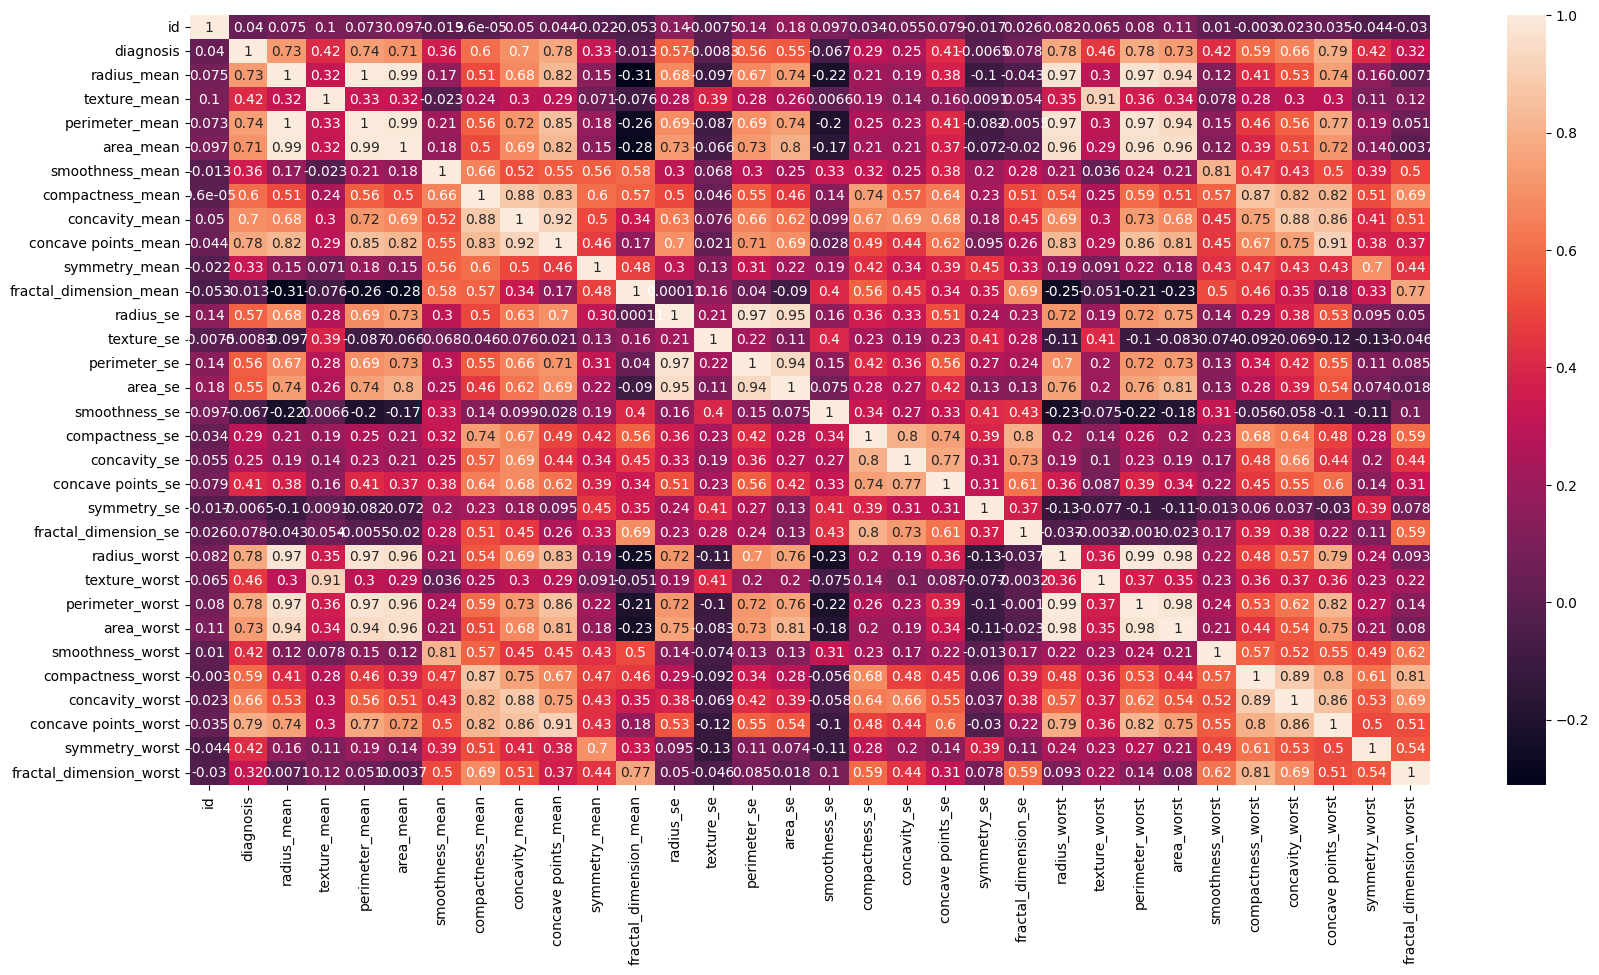

In [ ]:
plt.figure(figsize=(20,10)) 
sns.heatmap(data.corr(), annot=True) 